In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_dataset_1.csv")

In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
df1 = df.copy()

In [5]:
df = df.drop(columns = ["location"])

In [6]:
df.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0


# Exploratory Data Analysis

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  int64  
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   smoking_history       100000 non-null  int32  
 10  bmi                   100000 non-null  float64
 11  hbA1c_level           100000 non-null  float64
 12  blood_glucose_level   100000 non-null  float64
 13  diabetes              100000 non-null  int64  
dtypes: float64(4), int32(1), int64(9)
memory usage: 10.3 

In [7]:
df["age"] = df["age"].astype(int)

In [8]:
df.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [9]:
df["gender"] = df["gender"].apply(lambda x: 1 if x== "Male" else(2 if x == "female" else 0))

In [10]:
df.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,0,29,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,1,18,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,1,41,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,0,52,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [11]:
df.gender.unique()

array([0, 1], dtype=int64)

In [12]:
df.columns

Index(['year', 'gender', 'age', 'race:AfricanAmerican', 'race:Asian',
       'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension',
       'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [13]:
df['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

In [14]:
#normalize the column
df['smoking_history'] = df['smoking_history'].str.lower().str.strip()

In [15]:
#define mapping
mapping ={"never": 0,
         "not current": 1,
         "current": 2,
         "No Info": 3,
         "ever": 4,
         "former": 5}
df['smoking_history'] = df['smoking_history'].map(mapping).fillna(5).astype(int)

In [16]:
df.head(10)

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32,0,0,0,0,1,0,0,0,27.32,5.0,100,0
1,2015,0,29,0,1,0,0,0,0,0,0,19.95,5.0,90,0
2,2015,1,18,0,0,0,0,1,0,0,0,23.76,4.8,160,0
3,2015,1,41,0,0,1,0,0,0,0,0,27.32,4.0,159,0
4,2016,0,52,1,0,0,0,0,0,0,0,23.75,6.5,90,0
5,2016,1,66,0,0,1,0,0,0,0,1,27.32,5.7,159,0
6,2015,0,49,0,0,1,0,0,0,0,2,24.34,5.7,80,0
7,2016,0,15,0,0,0,0,1,0,0,5,20.98,5.0,155,0
8,2016,1,51,1,0,0,0,0,0,0,0,38.14,6.0,100,0
9,2015,1,42,0,0,1,0,0,0,0,5,27.32,5.7,160,0


In [17]:
df["bmi"].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

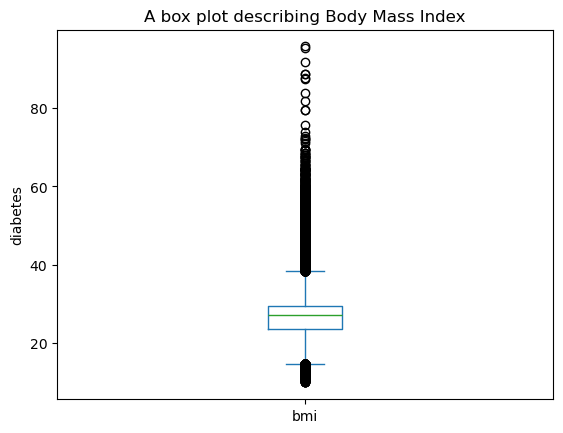

In [18]:
df["bmi"].plot(kind = "box")
plt.title("A box plot describing Body Mass Index")
plt.ylabel("diabetes")
plt.show()

<Axes: ylabel='Frequency'>

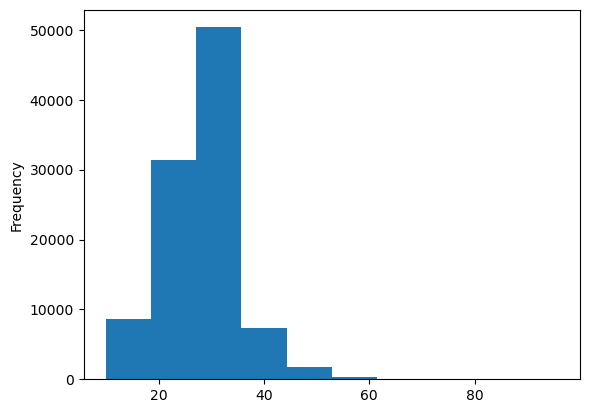

In [19]:
df["bmi"].plot(kind = "hist")

In [20]:
df.bmi.unique()

array([27.32, 19.95, 23.76, ..., 59.91, 50.8 , 10.34])

In [21]:
# Define the capping range
min_bmi = 15
max_bmi = 40

# Use a lambda function to cap BMI values
df['bmi'] = df['bmi'].apply(lambda x: max(min_bmi, min(x, max_bmi)))


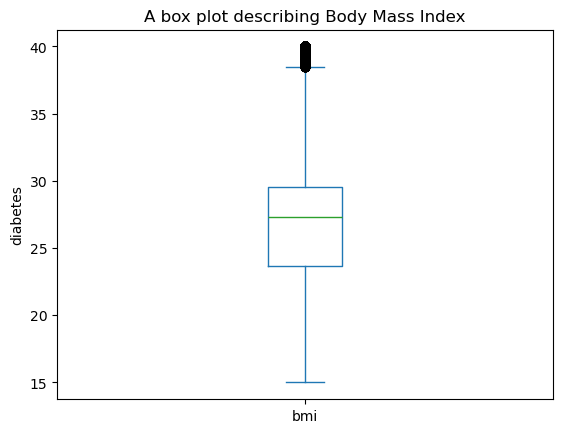

In [22]:
df["bmi"].plot(kind = "box")
plt.title("A box plot describing Body Mass Index")
plt.ylabel("diabetes")
plt.show()

<Axes: ylabel='Frequency'>

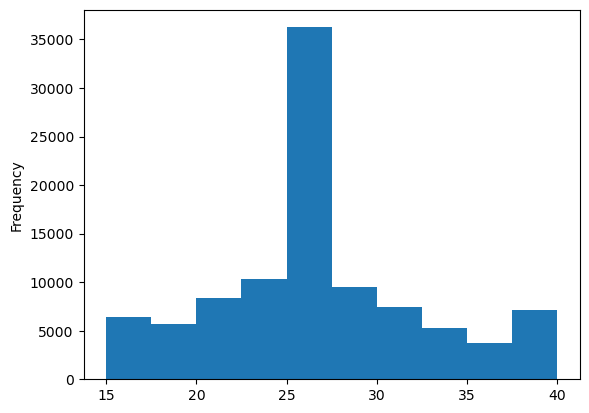

In [23]:
df["bmi"].plot(kind = "hist")

In [24]:
df.bmi.describe()

count    100000.000000
mean         27.073792
std           5.829274
min          15.000000
25%          23.630000
50%          27.320000
75%          29.580000
max          40.000000
Name: bmi, dtype: float64

In [25]:
df.columns

Index(['year', 'gender', 'age', 'race:AfricanAmerican', 'race:Asian',
       'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension',
       'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

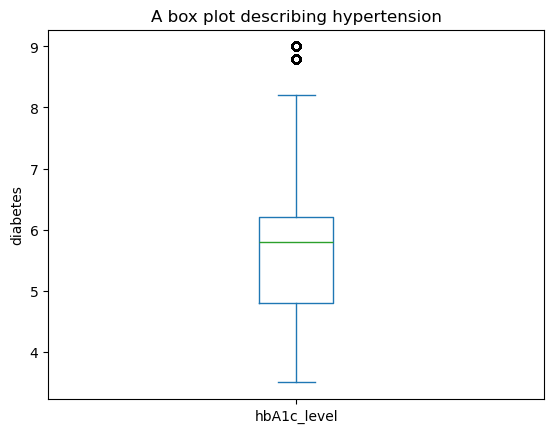

In [26]:
df["hbA1c_level"].plot(kind = "box")
plt.title("A box plot describing hbA1c_level")
plt.ylabel("diabetes")
plt.show()

In [27]:
df.hbA1c_level.describe()

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: hbA1c_level, dtype: float64

In [28]:
df.hbA1c_level.median()

5.8

In [29]:
# Use a lambda function to cap BMI values
df['hbA1c_level'] = df['hbA1c_level'].apply(lambda x: max(3, min(x, 8)))

In [30]:
df.hbA1c_level.describe()

count    100000.000000
mean          5.514357
std           1.034458
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           8.000000
Name: hbA1c_level, dtype: float64

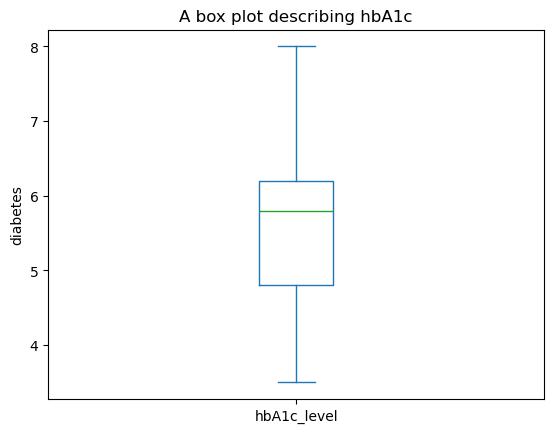

In [31]:
df["hbA1c_level"].plot(kind = "box")
plt.title("A box plot describing hbA1c")
plt.ylabel("diabetes")
plt.show()

<Axes: ylabel='Frequency'>

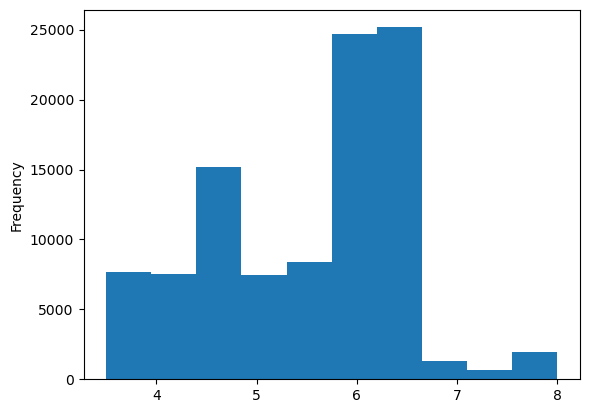

In [32]:
df.hbA1c_level.plot(kind = "hist")

In [33]:
df["blood_glucose_level"].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

<Axes: >

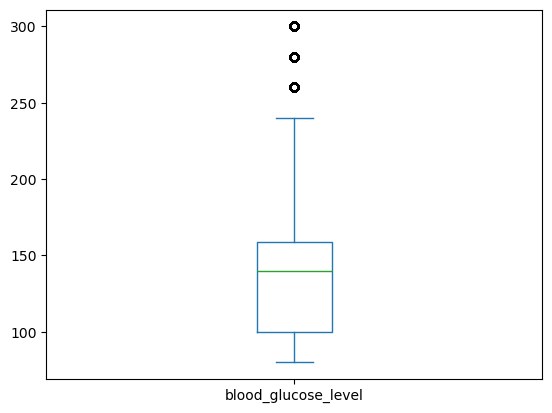

In [34]:
df["blood_glucose_level"].plot(kind = "box")

In [35]:
df['blood_glucose_level'] = df['blood_glucose_level'].apply(lambda x: max(80, min(x, 200)))

<Axes: >

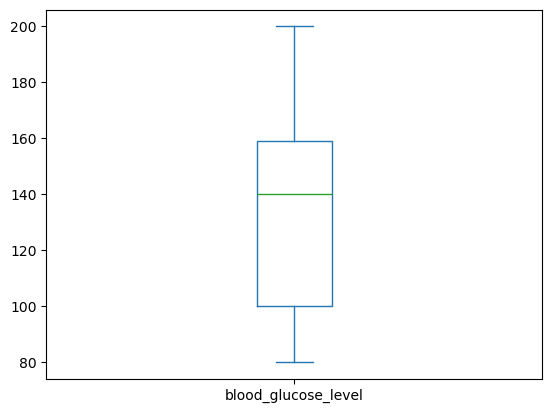

In [36]:
df['blood_glucose_level'].plot(kind = "box")

<Axes: ylabel='Frequency'>

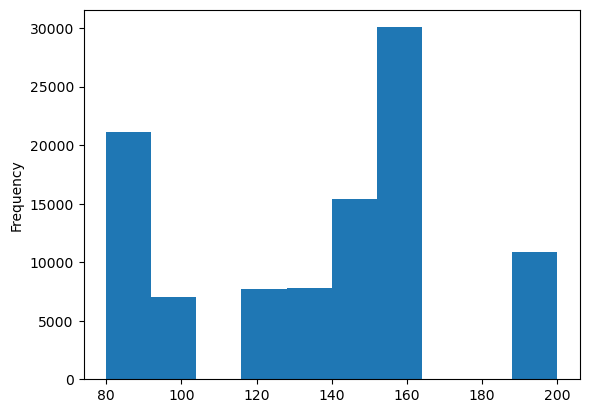

In [37]:
df['blood_glucose_level'].plot(kind = "hist")

In [38]:
df.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32,0,0,0,0,1,0,0,0,27.32,5.0,100,0
1,2015,0,29,0,1,0,0,0,0,0,0,19.95,5.0,90,0
2,2015,1,18,0,0,0,0,1,0,0,0,23.76,4.8,160,0
3,2015,1,41,0,0,1,0,0,0,0,0,27.32,4.0,159,0
4,2016,0,52,1,0,0,0,0,0,0,0,23.75,6.5,90,0


In [39]:
df.columns

Index(['year', 'gender', 'age', 'race:AfricanAmerican', 'race:Asian',
       'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension',
       'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [40]:
skewness = df[['age','race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level']].skew()


In [41]:
skewness

age                    -0.054997
race:AfricanAmerican    1.482709
race:Asian              1.498851
race:Caucasian          1.509744
race:Hispanic           1.508800
race:Other              1.500179
hypertension            3.231296
heart_disease           4.733872
bmi                     0.234844
hbA1c_level            -0.336808
blood_glucose_level    -0.005496
dtype: float64

In [42]:
#Data Scaling
#from sklearn.preprocessing import MinMaxScaler

In [43]:
 correlation = df['year'].corr(df['diabetes'])
correlation

-0.003464383361647767

In [44]:
correlation = df['blood_glucose_level'].corr(df['diabetes'])
correlation

0.29575890568595414

In [45]:
correlation = df['hbA1c_level'].corr(df['diabetes'])
correlation

0.37297880084506174

In [46]:
correlation = df['bmi'].corr(df['diabetes'])
correlation

0.21183039931084544

In [47]:
correlation = df['heart_disease'].corr(df['diabetes'])
correlation

0.17172684954884954

In [48]:
df.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32,0,0,0,0,1,0,0,0,27.32,5.0,100,0
1,2015,0,29,0,1,0,0,0,0,0,0,19.95,5.0,90,0
2,2015,1,18,0,0,0,0,1,0,0,0,23.76,4.8,160,0
3,2015,1,41,0,0,1,0,0,0,0,0,27.32,4.0,159,0
4,2016,0,52,1,0,0,0,0,0,0,0,23.75,6.5,90,0


In [49]:
df.drop(columns = ["year"], inplace = True)

In [50]:
df.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,32,0,0,0,0,1,0,0,0,27.32,5.0,100,0
1,0,29,0,1,0,0,0,0,0,0,19.95,5.0,90,0
2,1,18,0,0,0,0,1,0,0,0,23.76,4.8,160,0
3,1,41,0,0,1,0,0,0,0,0,27.32,4.0,159,0
4,0,52,1,0,0,0,0,0,0,0,23.75,6.5,90,0


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected features
df[['blood_glucose_level', 'bmi', 'age', 'hbA1c_level']] = scaler.fit_transform(df[['blood_glucose_level', 'bmi', 'age', 'hbA1c_level']])


In [53]:
df.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,-0.438231,0,0,0,0,1,0,0,0,0.042237,-0.497226,-1.017804,0
1,0,-0.571355,0,1,0,0,0,0,0,0,-1.222078,-0.497226,-1.300175,0
2,1,-1.059478,0,0,0,0,1,0,0,0,-0.568477,-0.690565,0.676425,0
3,1,-0.038857,0,0,1,0,0,0,0,0,0.042237,-1.463921,0.648188,0
4,0,0.449266,1,0,0,0,0,0,0,0,-0.570192,0.952816,-1.300175,0


# Machine Learning Model Building

# Split X and y

In [54]:
X = df.drop(columns = ["diabetes"])
y = df["diabetes"]

In [55]:
X.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level
0,0,-0.438231,0,0,0,0,1,0,0,0,0.042237,-0.497226,-1.017804
1,0,-0.571355,0,1,0,0,0,0,0,0,-1.222078,-0.497226,-1.300175
2,1,-1.059478,0,0,0,0,1,0,0,0,-0.568477,-0.690565,0.676425
3,1,-0.038857,0,0,1,0,0,0,0,0,0.042237,-1.463921,0.648188
4,0,0.449266,1,0,0,0,0,0,0,0,-0.570192,0.952816,-1.300175


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

# Model Training

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =.20, random_state = 42, shuffle = True)

In [59]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(80000, 13)
(20000, 13)
(80000,)
(20000,)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Make predictions
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.95195


In [65]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[18084   213]
 [  748   955]]


# K- Nearest Neighbour

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Create and train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
#make prediction
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import f1_score

In [70]:
#evaluation metrics
f1 = f1_score(y_test, y_pred, average = "weighted")
print(f"F1_Score: {f1}")

F1_Score: 0.9421020998435906


In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.9456


In [72]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n {cm}")

Confusion Matrix: 
 [[17962   335]
 [  753   950]]


# Decision Tree Classifier

In [73]:
# Create and train the model
rf = DecisionTreeClassifier(random_state=42)
rf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Make predictions and evaluate
y_pred = rf.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9361


In [76]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[17613   684]
 [  594  1109]]


# Random forest Classifier

In [77]:
# Create and train the model
RanF = RandomForestClassifier(n_estimators=100, random_state=42)
RanF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Make predictions and evaluate
y_pred = RanF.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9588


In [80]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[18139   158]
 [  666  1037]]


# Support Vector Machine

In [81]:
from sklearn.svm import SVC

In [82]:
# Create and train the model
SV = SVC(kernel='linear', random_state=42)
SV.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [83]:
# Make predictions and evaluate
y_pred = SV.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.9505


In [85]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[18176   121]
 [  869   834]]


# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [88]:
# Make predictions and evaluate
y_pred = gb_model.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f"GB Accuracy: {accuracy}")

GB Accuracy: 0.9606


In [90]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[18161   136]
 [  652  1051]]


# XGBOOST CLASSIFIER

In [91]:
import xgboost as xgb

In [92]:
# Create and train the model
XG_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XG_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [93]:
# Make predictions and evaluate
y_pred = XG_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.95885


In [94]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[18125   172]
 [  651  1052]]


In [95]:
from sklearn.metrics import classification_report, precision_score, recall_score

In [96]:
# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8595
Recall: 0.6177


In [97]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.62      0.72      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [109]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba)  # Predicted probabilities
print("AUC Score:", auc)

NameError: name 'y_pred_proba' is not defined